## Line depth-dependence wavelength shifts

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [23]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
VIS_data = VIS_data[VIS_data["Observed wavelength"].between(4000,8000,inclusive='right')]
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).reset_index(drop=True)

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

### Granulation patterns

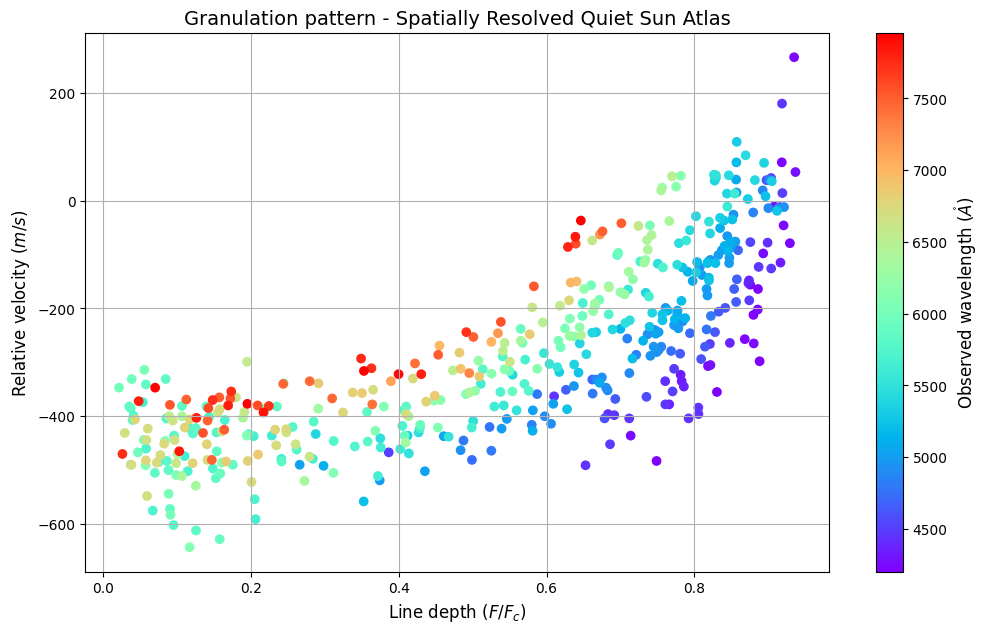

In [3]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Granulation pattern - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)

ax.grid()

# fig1.savefig('GranulationPattern_SPA.pdf')

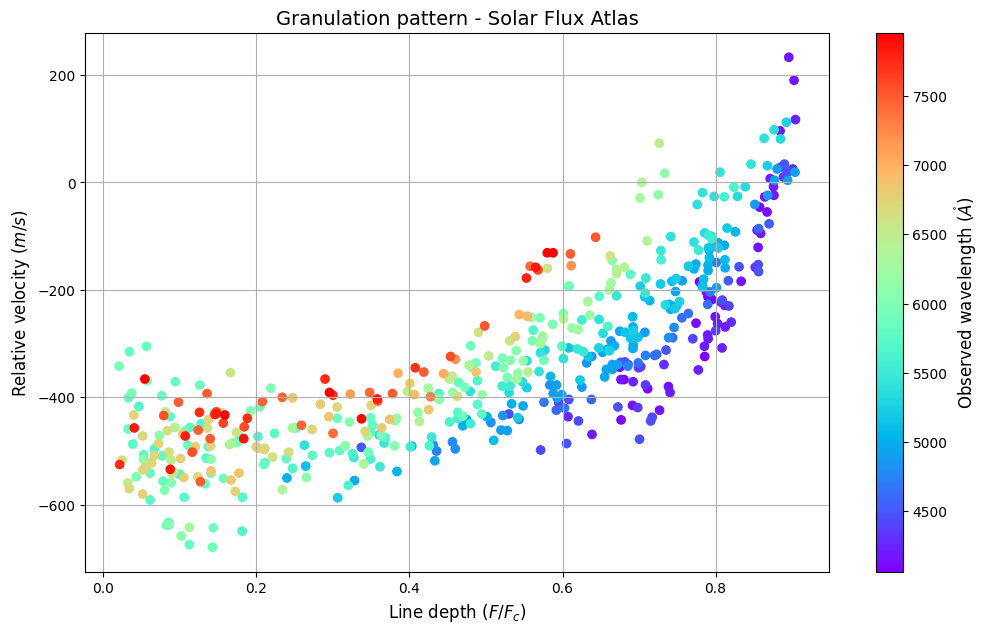

In [24]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Granulation pattern - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)

ax.grid()

# fig2.savefig('GranulationPattern_ALL.pdf')

## Attempt for characterization

### Ellwarth standard curve (include the other atlas)

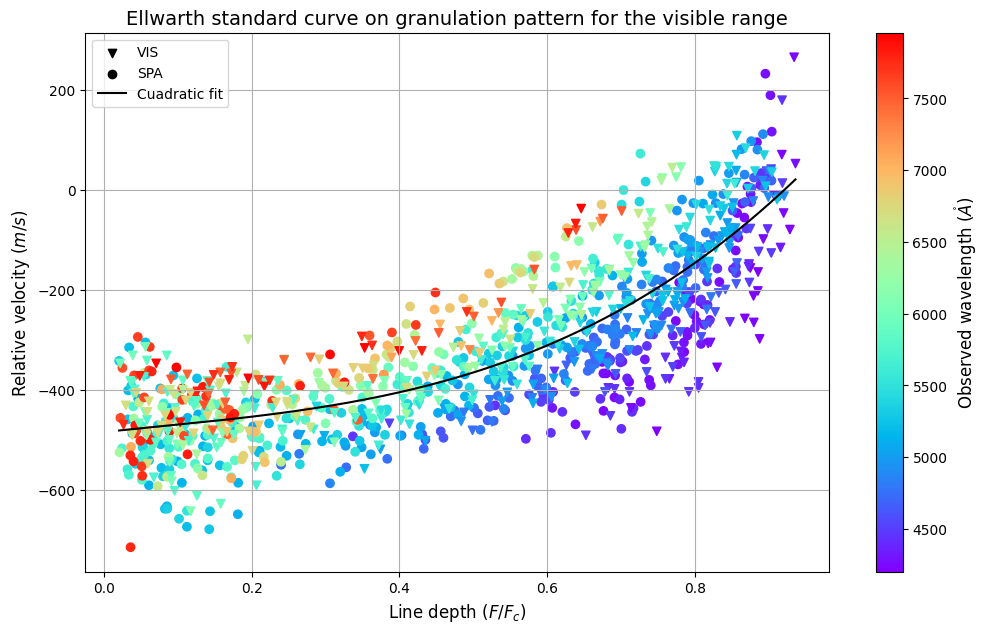

In [5]:
fig4, ax = plt.subplots(1,1,figsize=(12,7))

pol = Polynomial.fit(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0),pd.concat([VIS_data['Velocity'],SPA_data['Velocity']],axis=0), 3)
param = pol.convert().coef
values_flux = np.linspace(min(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)), max(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)), len(pd.concat([1-VIS_data['Flux'],1-SPA_data['Flux']],axis=0)))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.scatter([],[],marker='v',color='k',label='VIS')
ax.scatter([],[],marker='o',color='k',label='SPA')

ax.plot(values_flux,flux_fit,color='k',label='Cuadratic fit')

ax.set_title('Ellwarth standard curve on granulation pattern for the visible range',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig4.savefig('Standard curve_Ellwarth.pdf')

#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines

## Wavelength-dependence of line depth for specific velocity

### Visible range

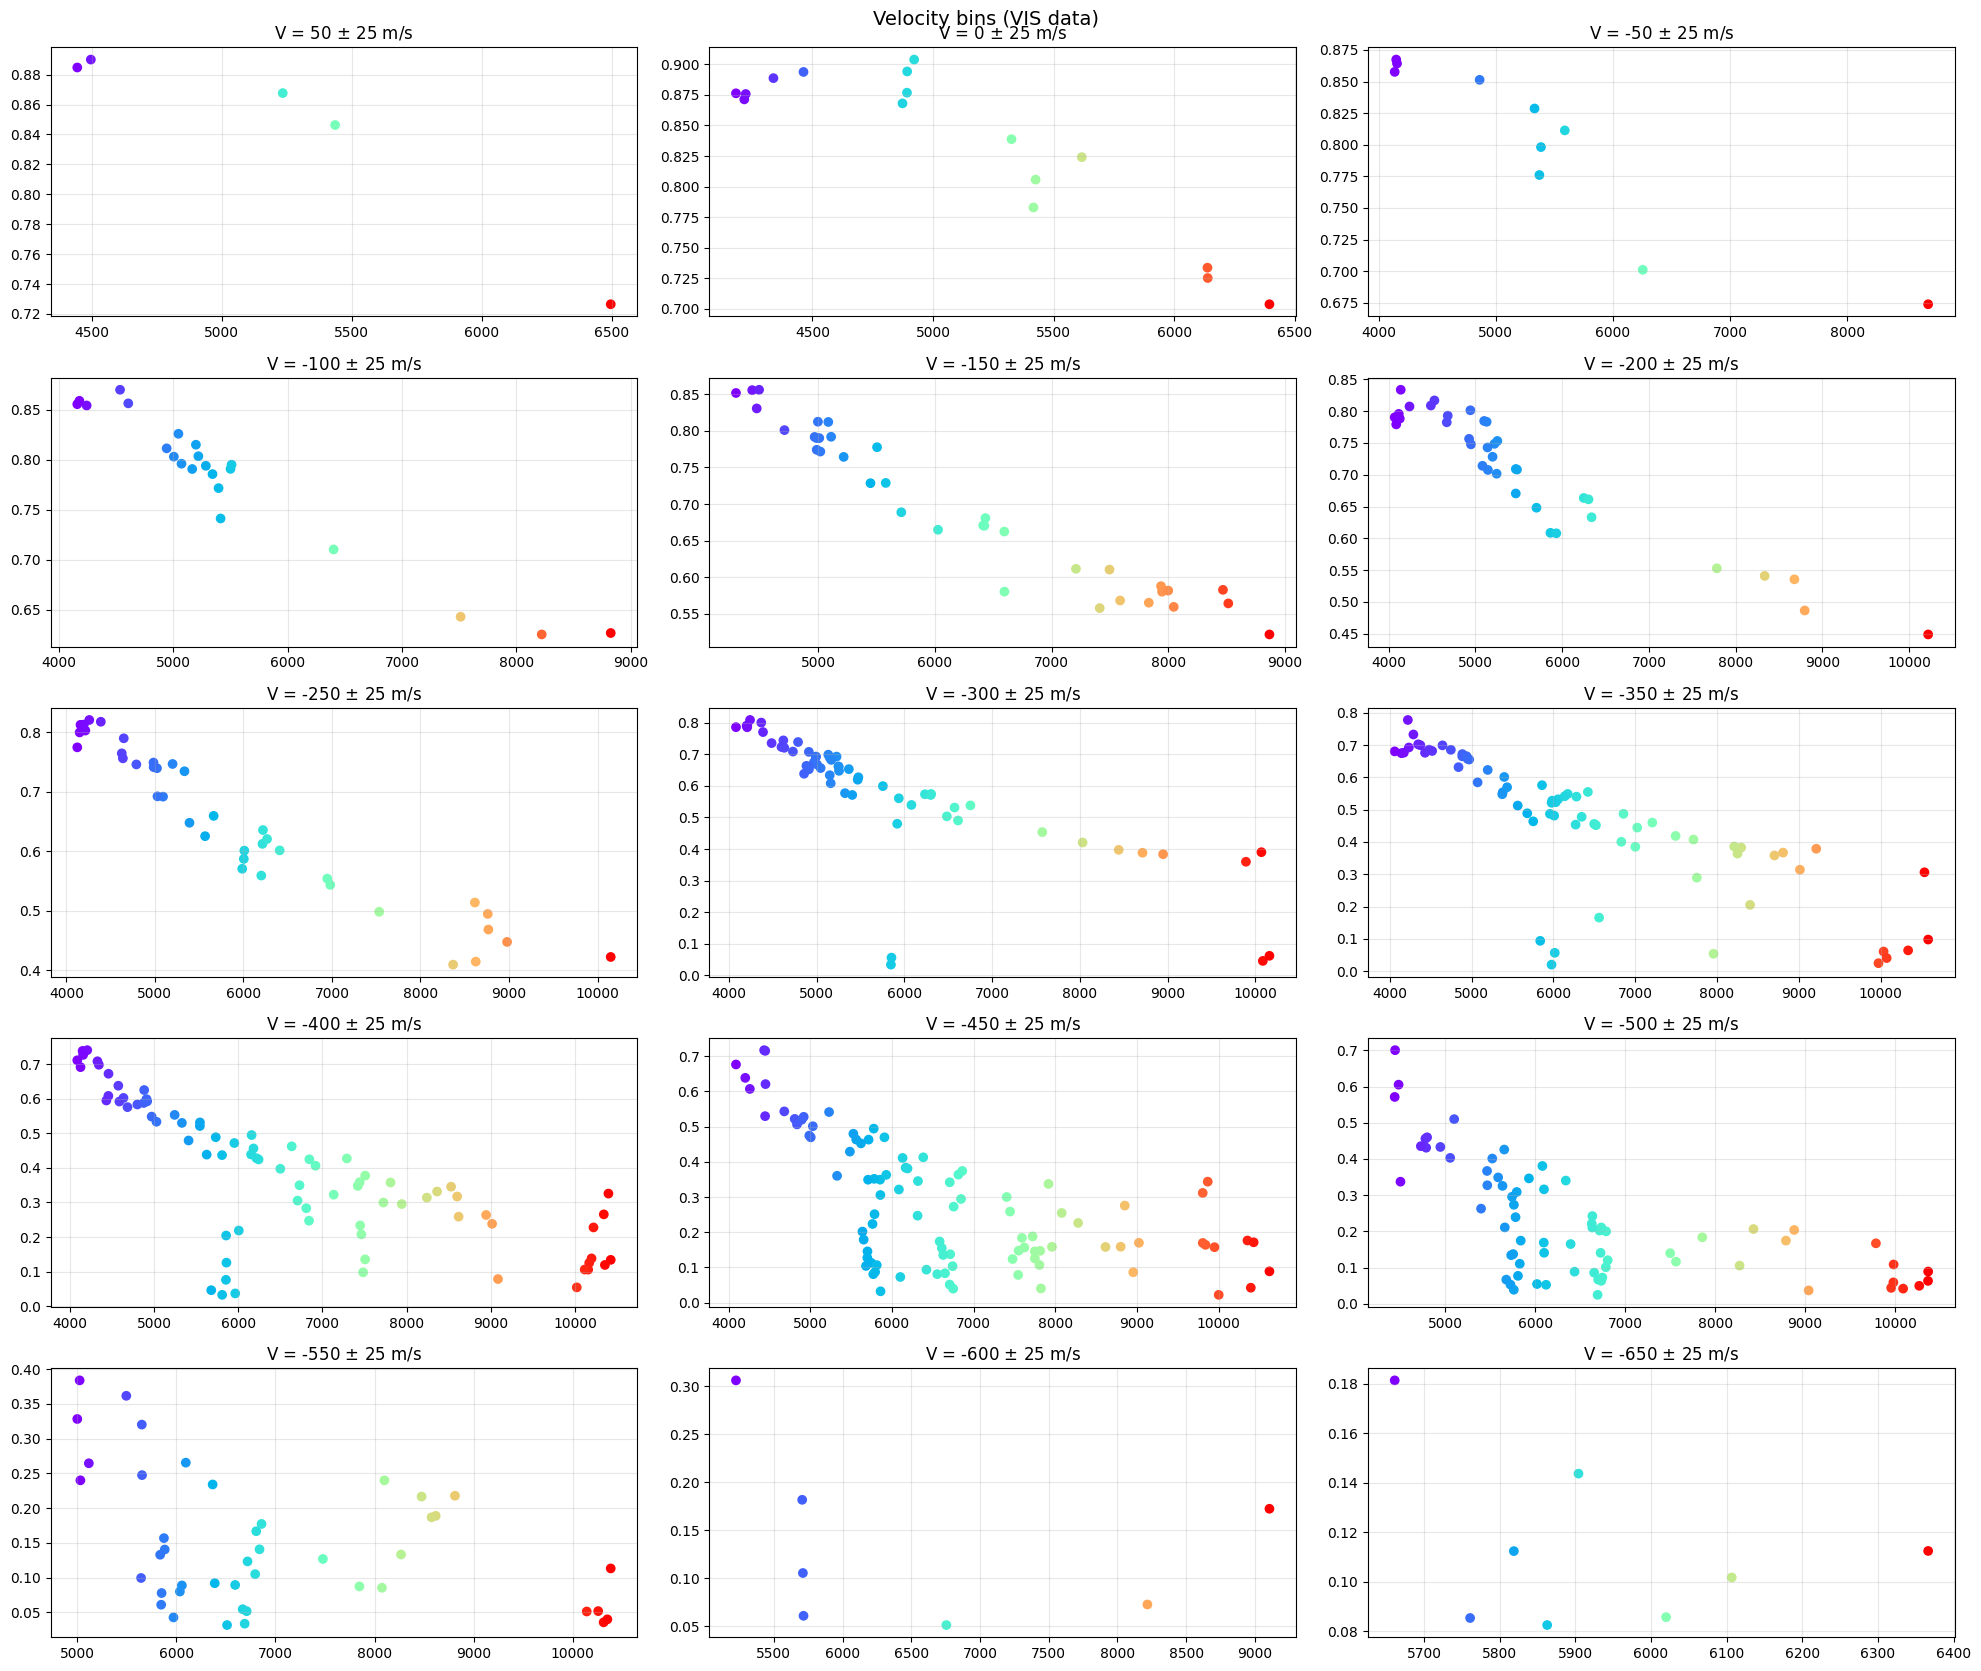

In [6]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

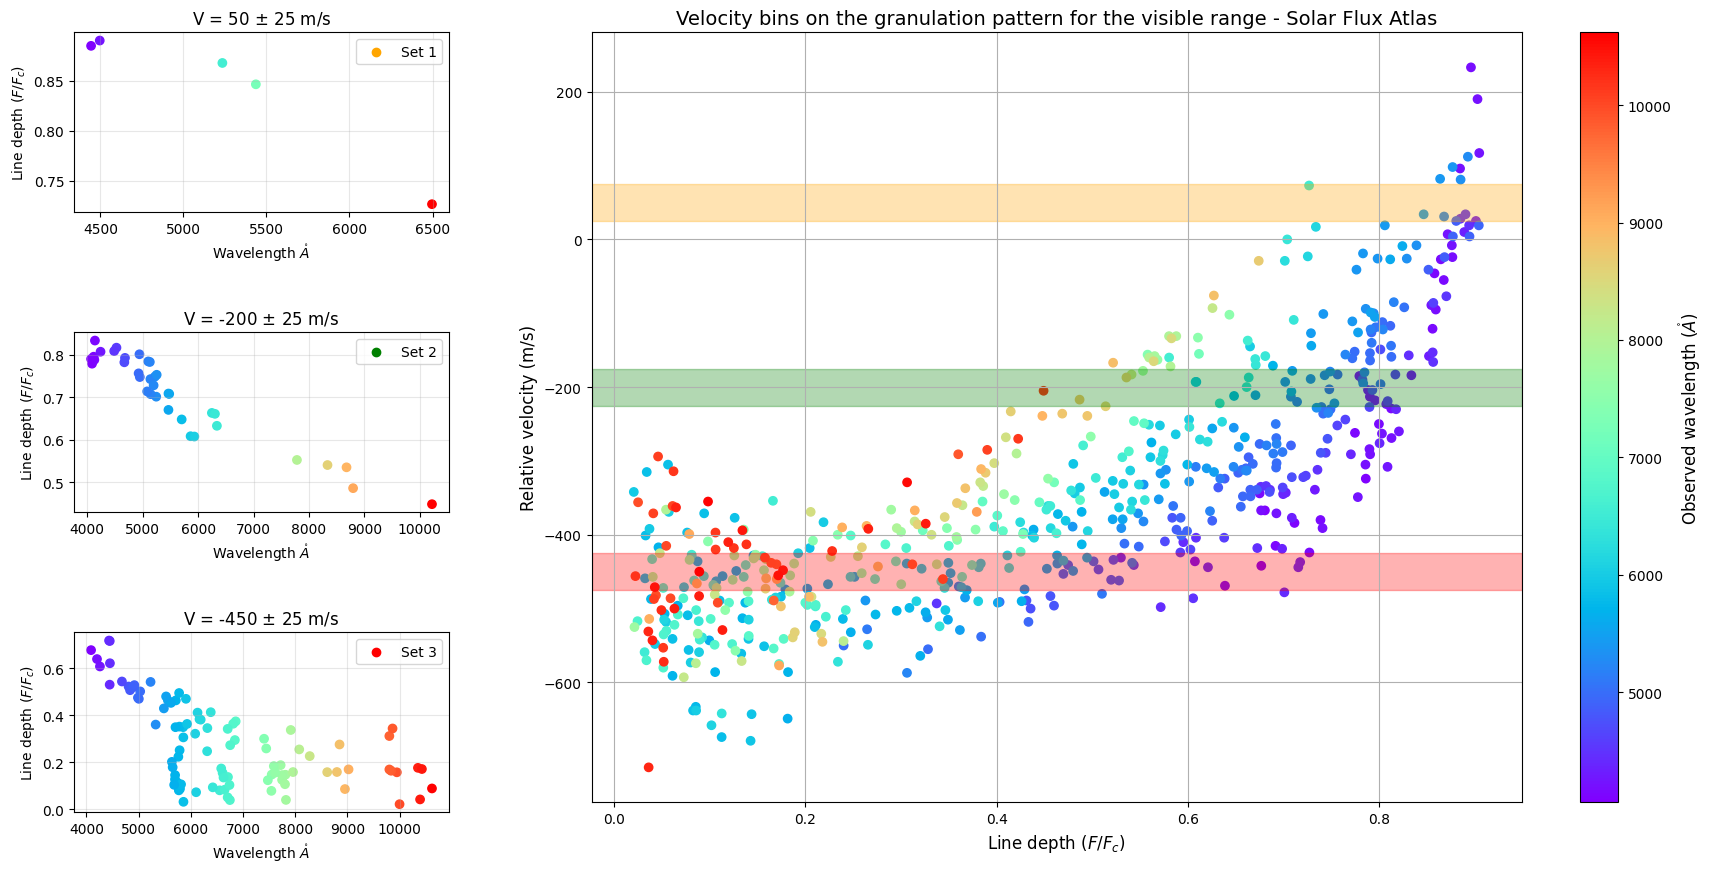

In [7]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Velocity bins on the granulation pattern for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graph the zoom
i=0
ax_inseti.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.legend()

j=5
ax_insetj.scatter(velocity_VIS[j]['Observed wavelength'],1-velocity_VIS[j]['Flux'],c=velocity_VIS[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=10
ax_insetk.scatter(velocity_VIS[k]['Observed wavelength'],1-velocity_VIS[k]['Flux'],c=velocity_VIS[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins VIS_plot.pdf', bbox_inches='tight')

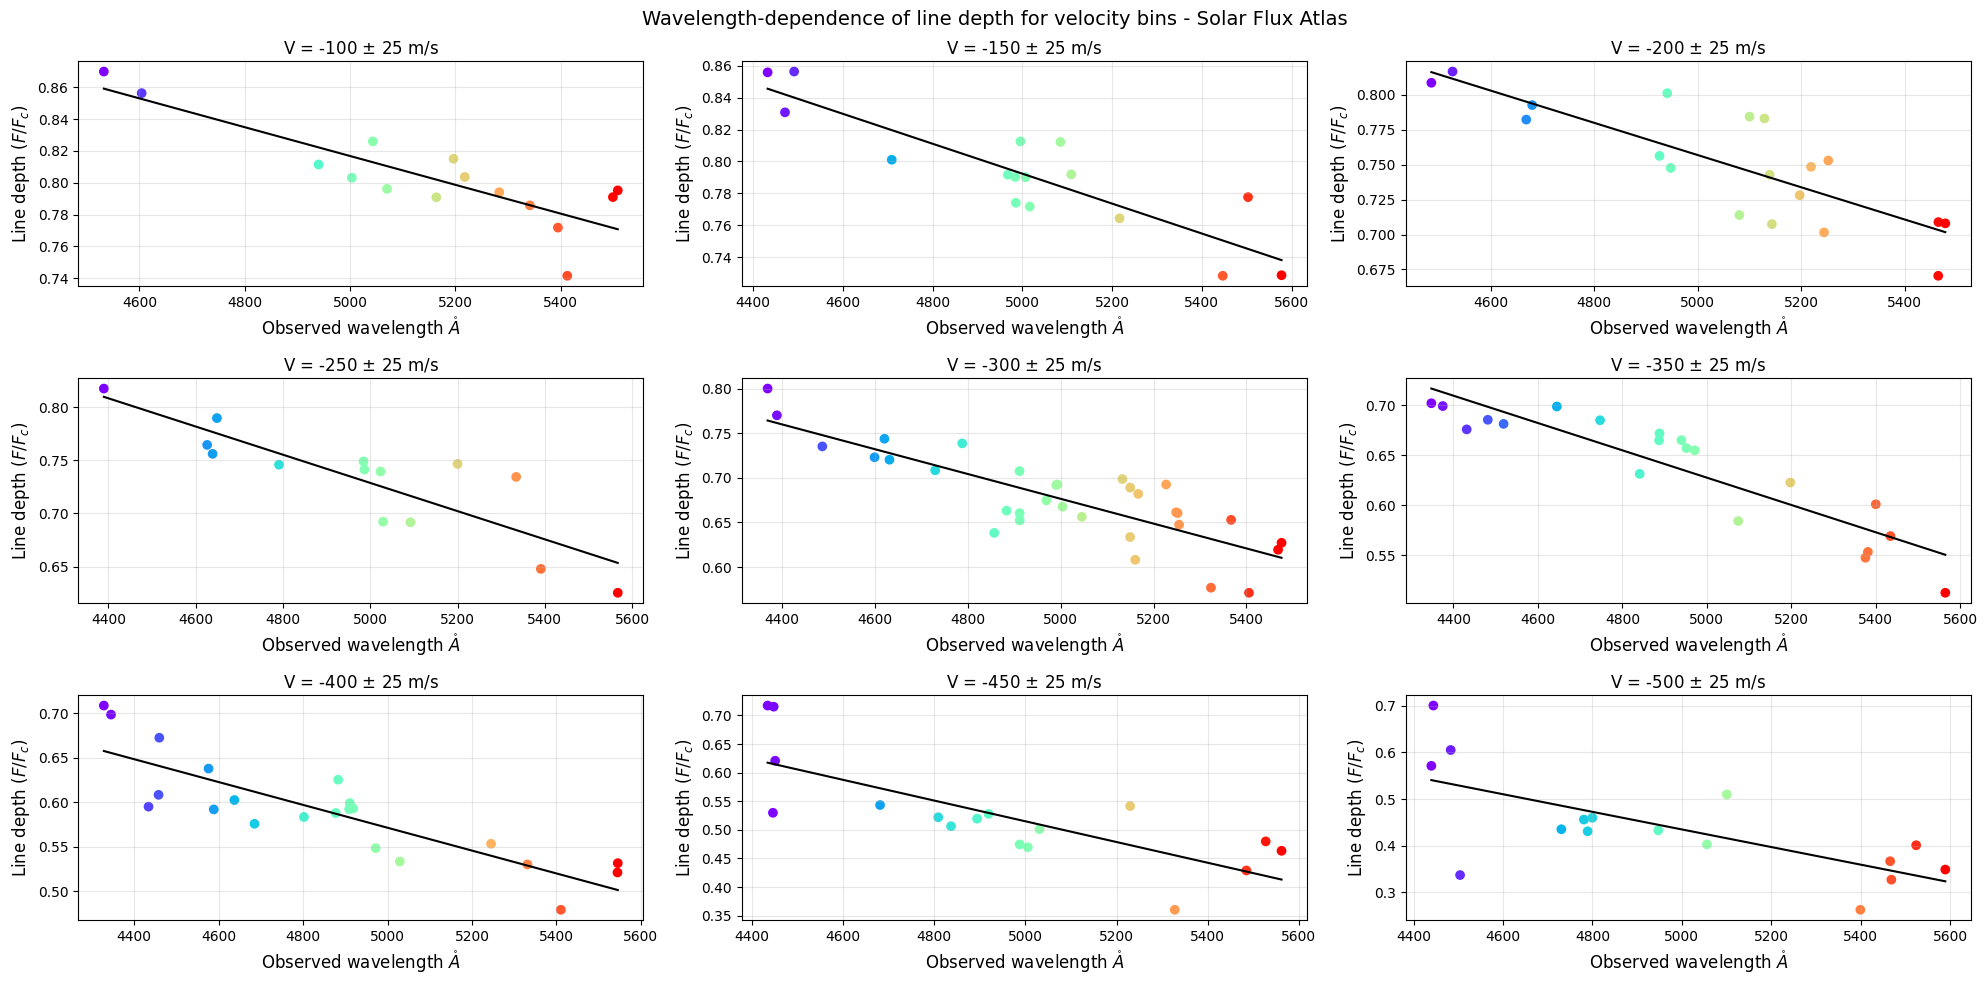

In [8]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []

for i in range(3,12):
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_VIS.append([values_flux,flux_fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

values_param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
values_param_VIS.columns = ['A','B']
values_param_VIS = values_param_VIS.set_axis(markers[3:12], axis=0)

#Take just the values that we want
velocity_VIS_new = velocity_VIS[3:12]
markers_new = markers[3:12]

fig4, axes = plt.subplots(3, 3, figsize=(20, 10))
fig4.suptitle('Wavelength-dependence of line depth for velocity bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],1-wave_VIS[i]['Flux'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig4.savefig('Velocity bins VIS.pdf')

In [9]:
values_param_VIS

,A,B
-100,1.270417,-0.000091
-150,1.260197,-0.000094
-200,1.334044,-0.000115
-250,1.392099,-0.000133
-300,1.372480,-0.000139
-350,1.310685,-0.000137
-400,1.211962,-0.000128
-450,1.421268,-0.000181
-500,1.378785,-0.000189


### Spatial data

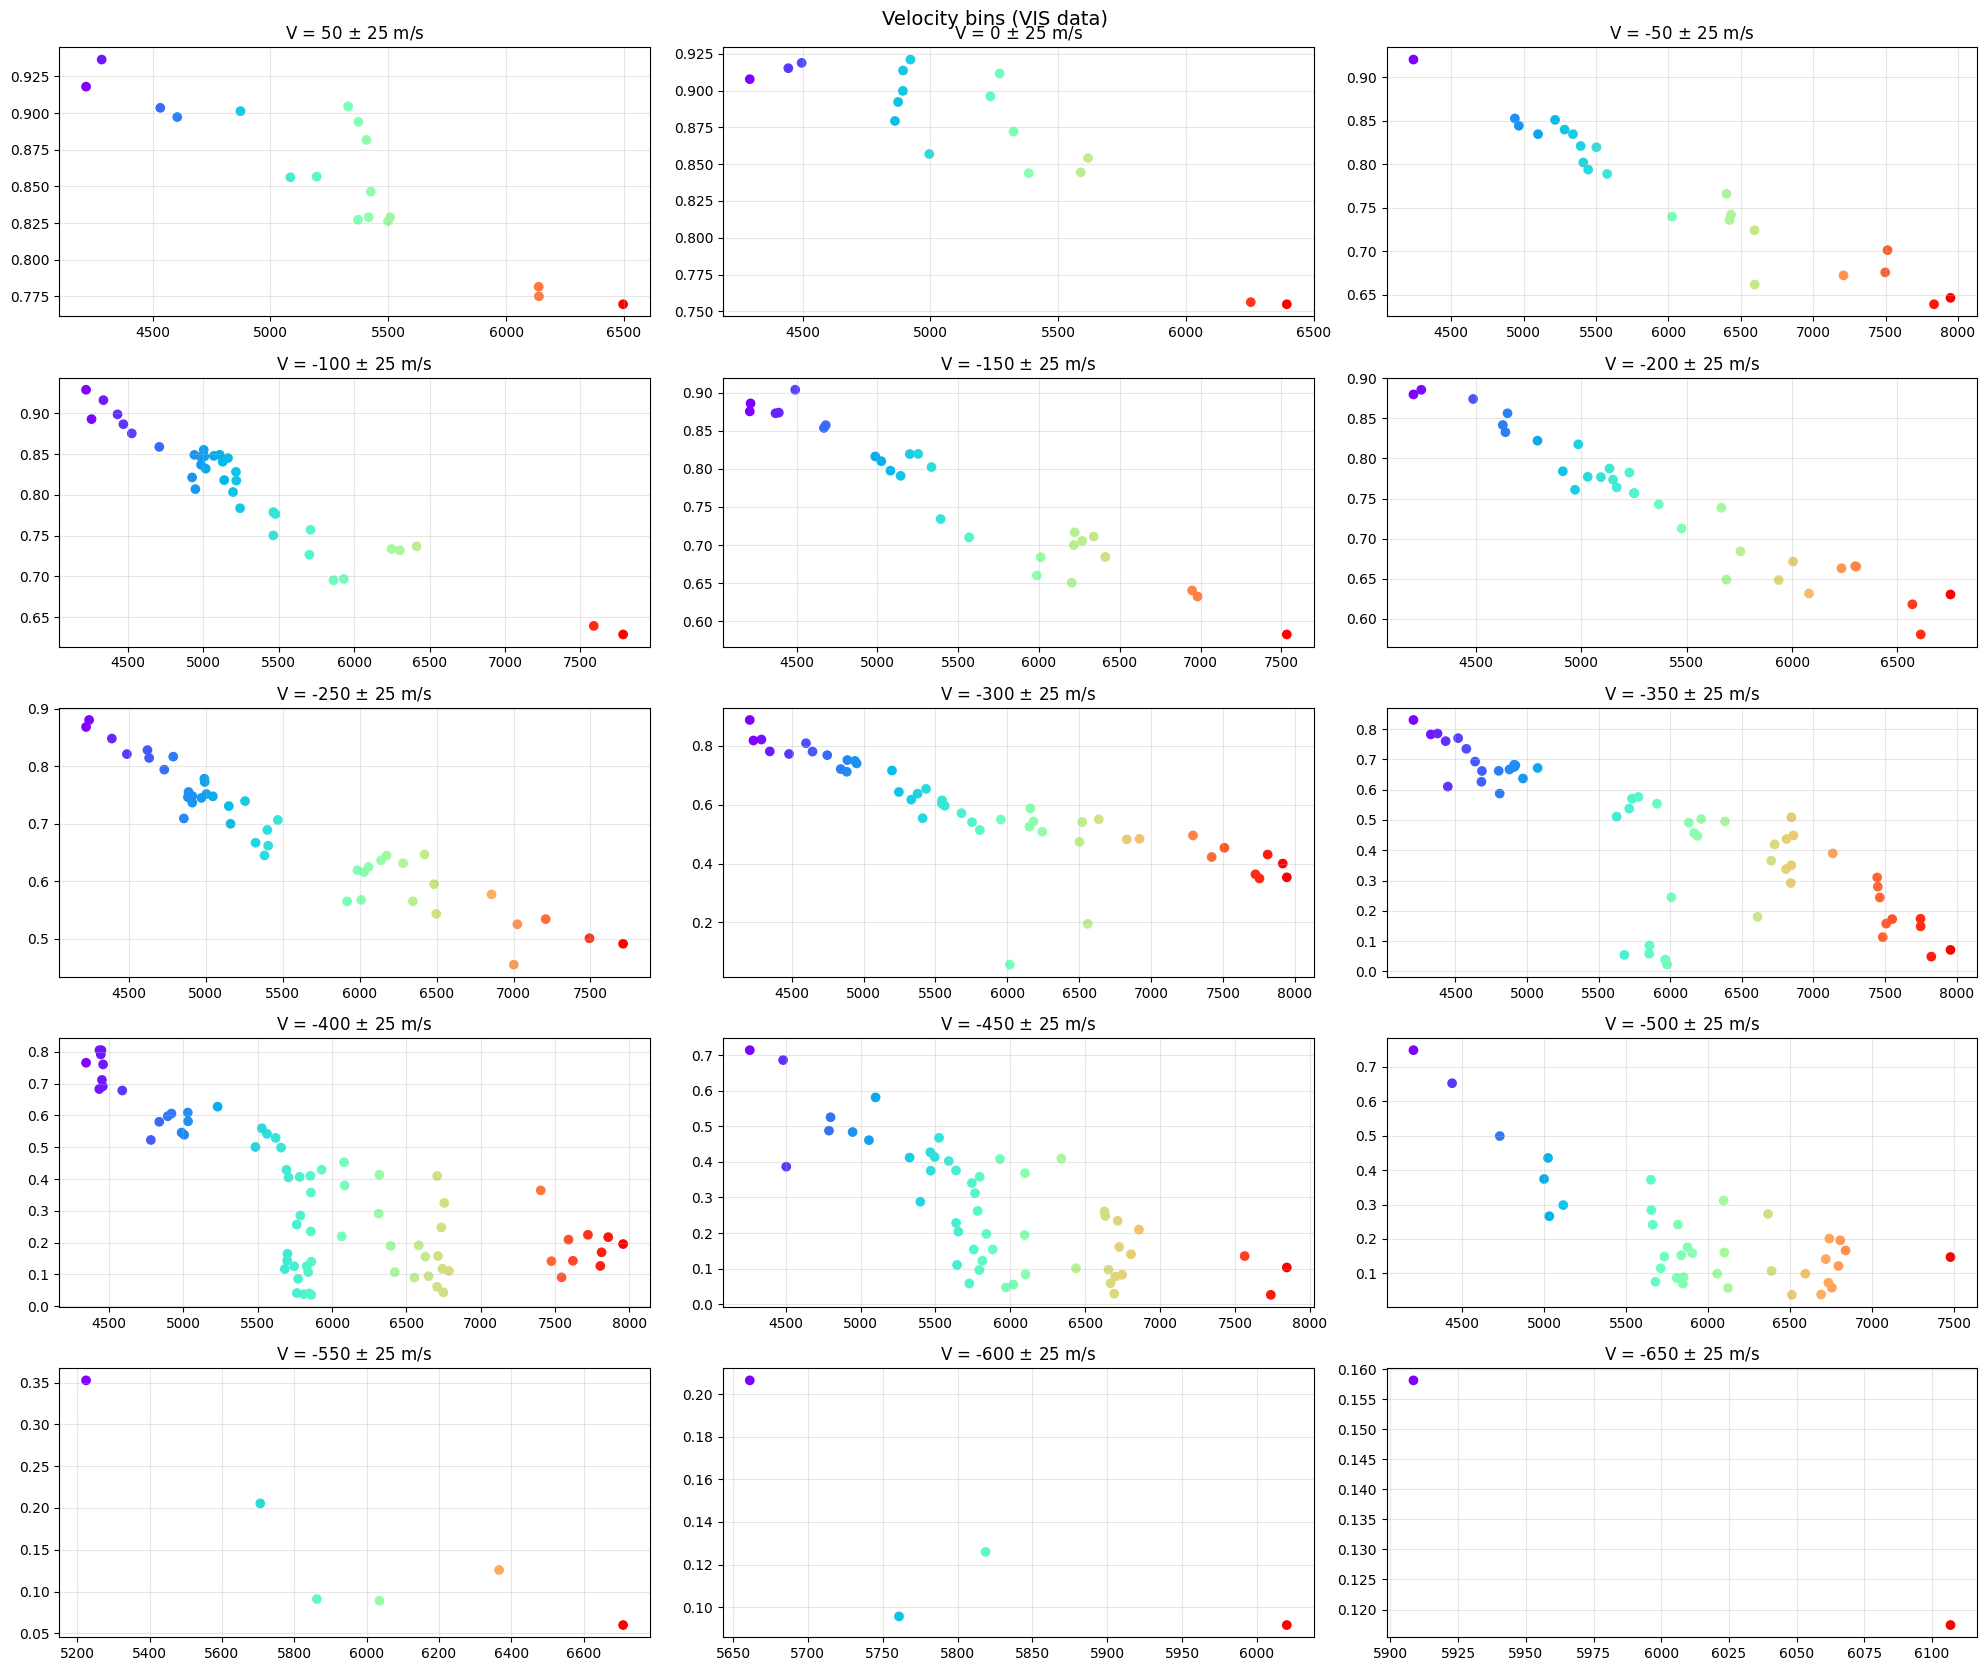

In [10]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


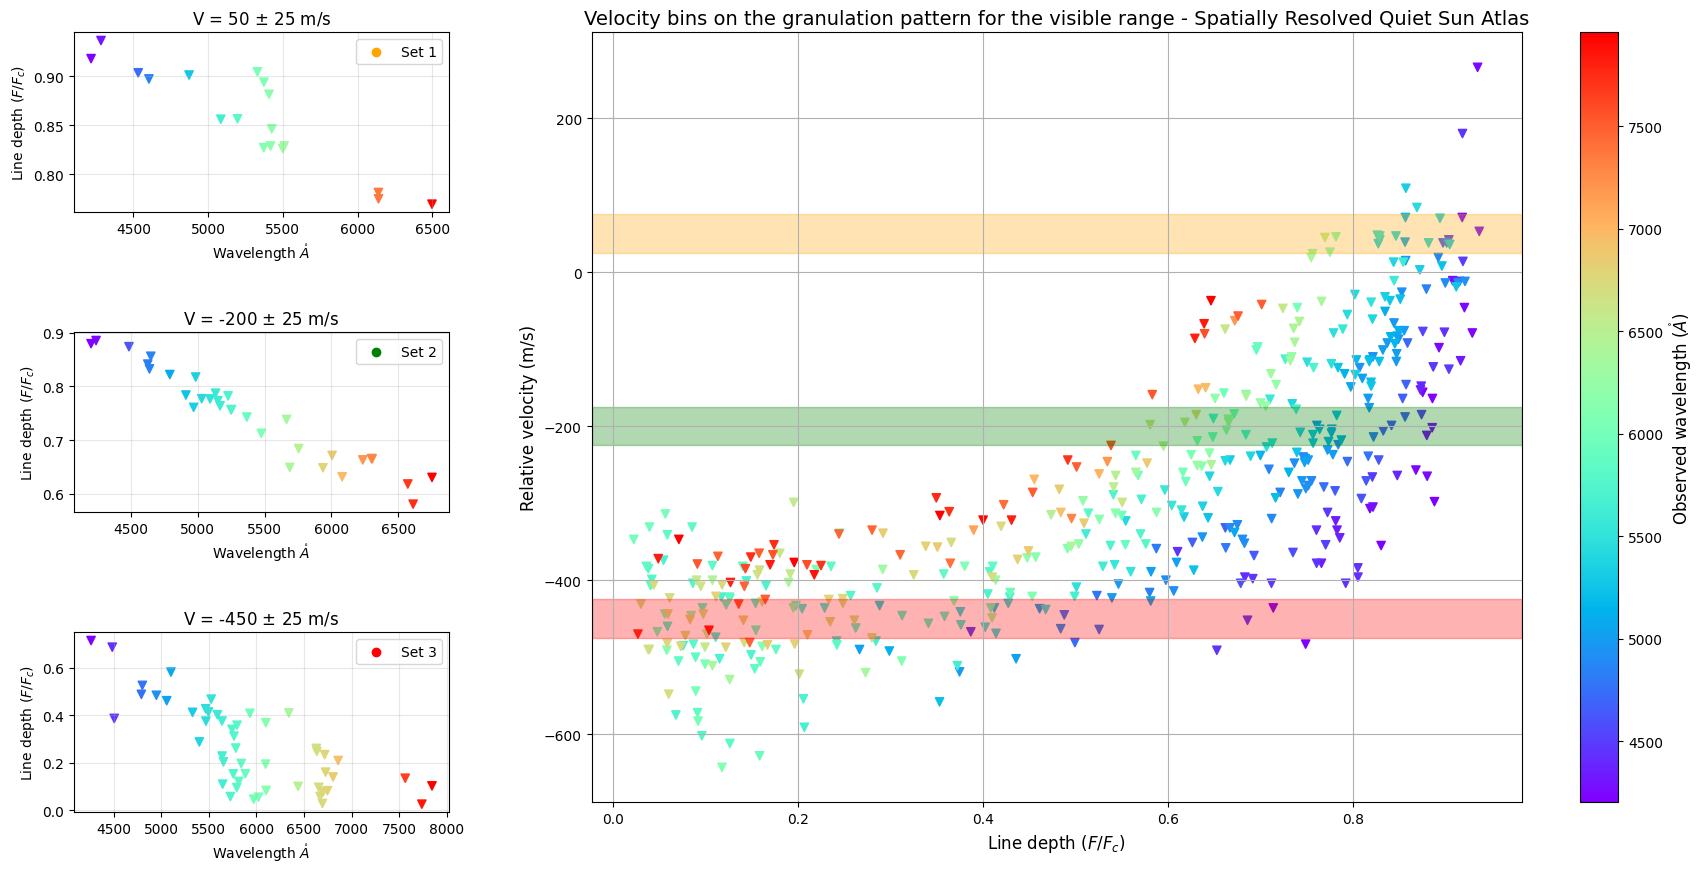

In [11]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(1-SPA_data['Flux'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Velocity bins on the granulation pattern for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.legend()

j=5
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],1-velocity_SPA[j]['Flux'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=10
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],1-velocity_SPA[k]['Flux'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins SPA_plot.pdf', bbox_inches='tight')

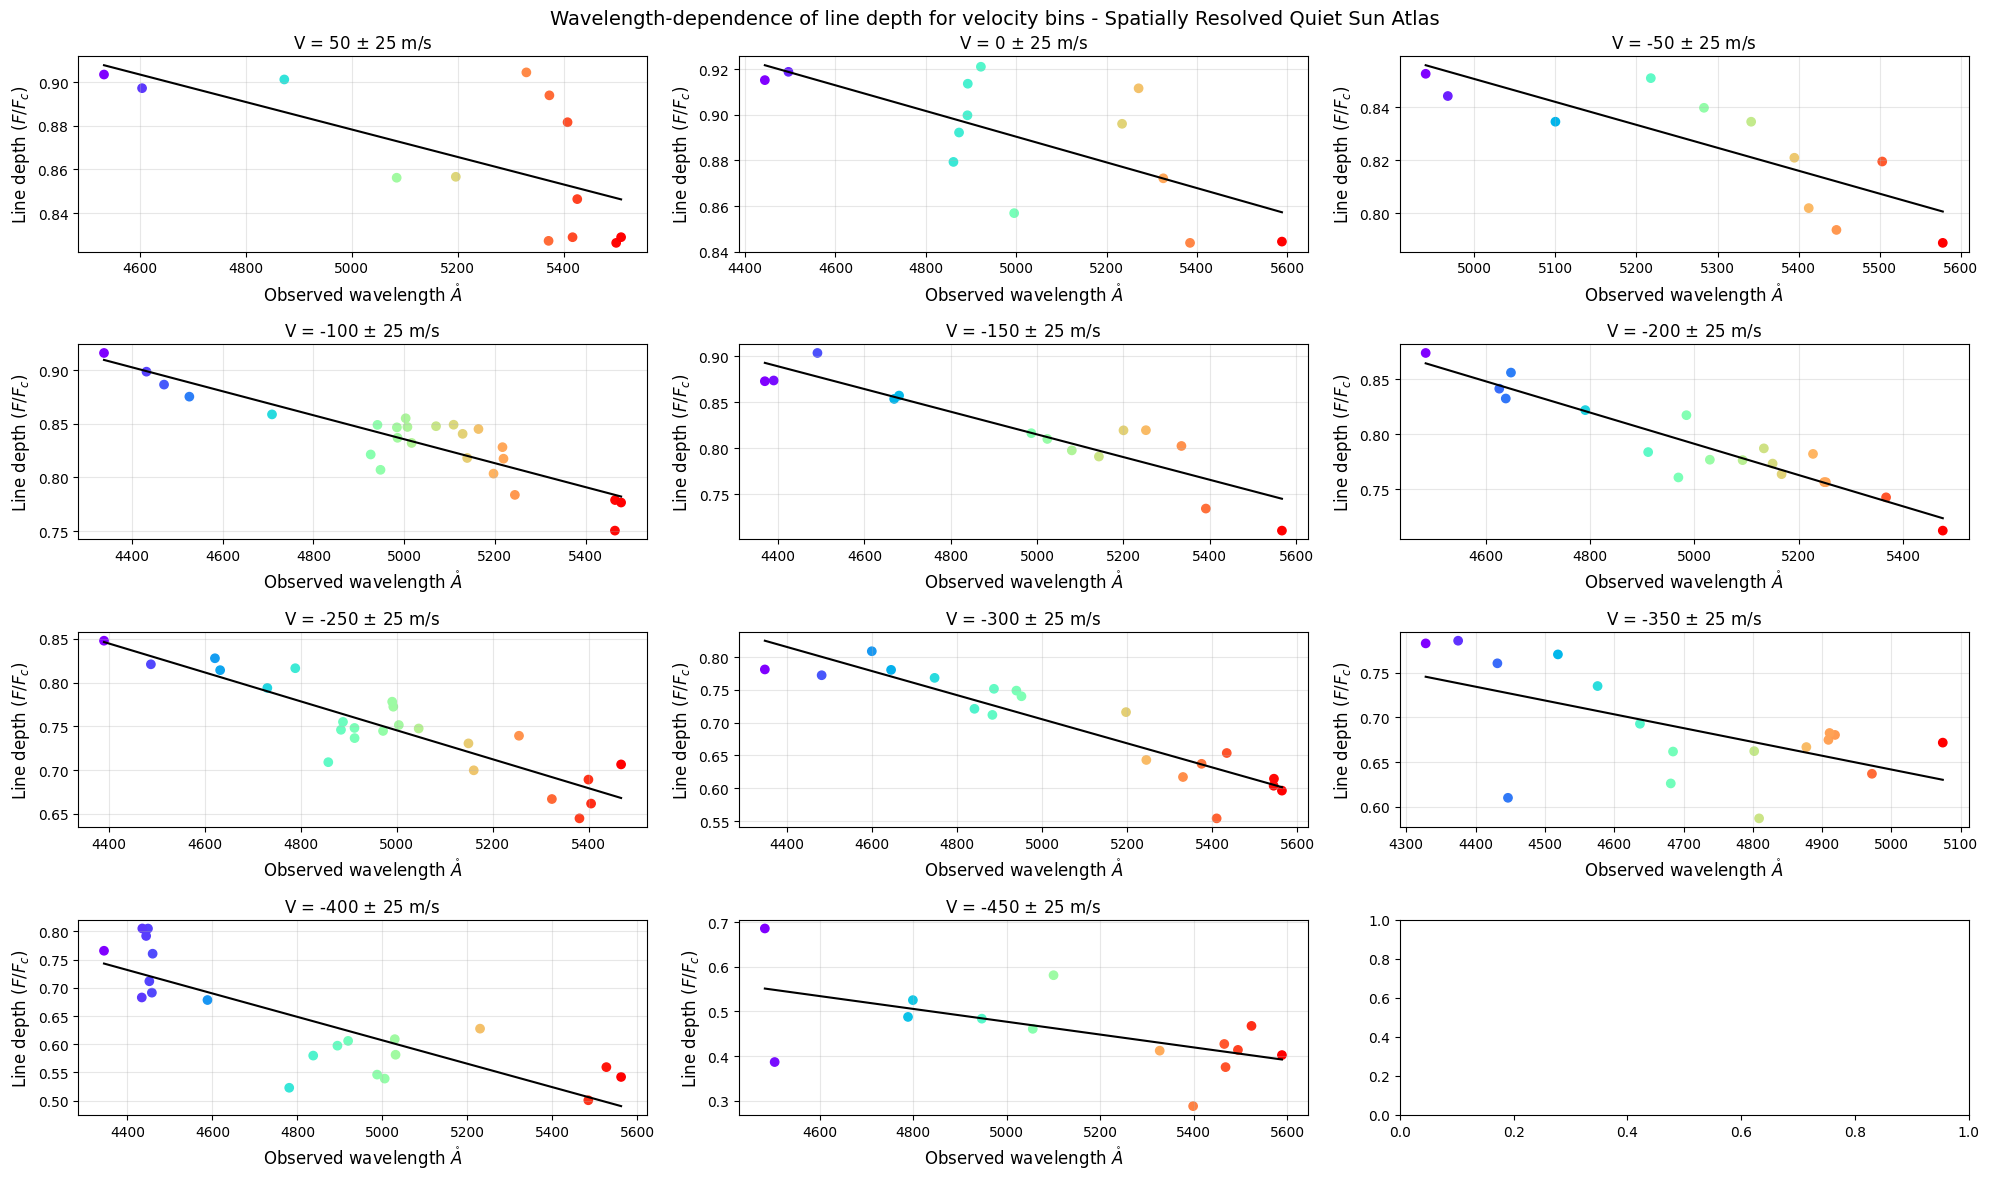

In [12]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []

for i in range(0,11):
    new_data = velocity_SPA[i][velocity_SPA[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    pol = Polynomial.fit(new_data['Observed wavelength'],1-new_data['Flux'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['A','B']
values_param_SPA = values_param_SPA.set_axis(markers[0:11], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_SPA[0:11]
markers_new = markers[0:11]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Wavelength-dependence of line depth for velocity bins - Spatially Resolved Quiet Sun Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Observed wavelength'],1-wave_SPA[i]['Flux'],c=wave_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [13]:
values_param_SPA

,A,B
50,1.193762,-0.000063
0,1.172029,-0.000056
-50,1.284067,-0.000087
-100,1.395371,-0.000112
-150,1.432798,-0.000124
-200,1.502800,-0.000142
-250,1.571222,-0.000165
-300,1.623338,-0.000184
-350,1.412965,-0.000154
-400,1.645521,-0.000208


The rotation is not the reason of chromodependence, when we observe the center disk spectrum and measure the rotation is greater than the full disk integrated atlas.

## Gray and Oostra standard curve

### Give a second order polynomial fit for each color

In [14]:
#Separate for range in colors
values_VIS = [ VIS_data[VIS_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                VIS_data[VIS_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]

values_SPA = [SPA_data[SPA_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                SPA_data[SPA_data['Observed wavelength'].between(7800, 11000, inclusive='neither')]
]


values_ALL = [ ALL_data[ALL_data['Observed wavelength'].between(3800, 4270, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4270, 4760, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4760, 4970, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(4970, 5700, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(5700, 5810, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(5810, 6180, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(6180, 7800, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(7800, 11000, inclusive='neither')],
                ALL_data[ALL_data['Observed wavelength'].between(11000, 25000, inclusive='neither')]]

values_VIS_standard = VIS_data[VIS_data['Observed wavelength'].between(6020,6340, inclusive='right')]

The range used on Gray and Oostra article for the standard curve was 6020–6340 Å, we can stablish just a green range (4970-5700 Å) for comparised and report all the color curves started on violet range.

For consistency, the standard curve is comparised only using the visible range for the solar flux atlas.

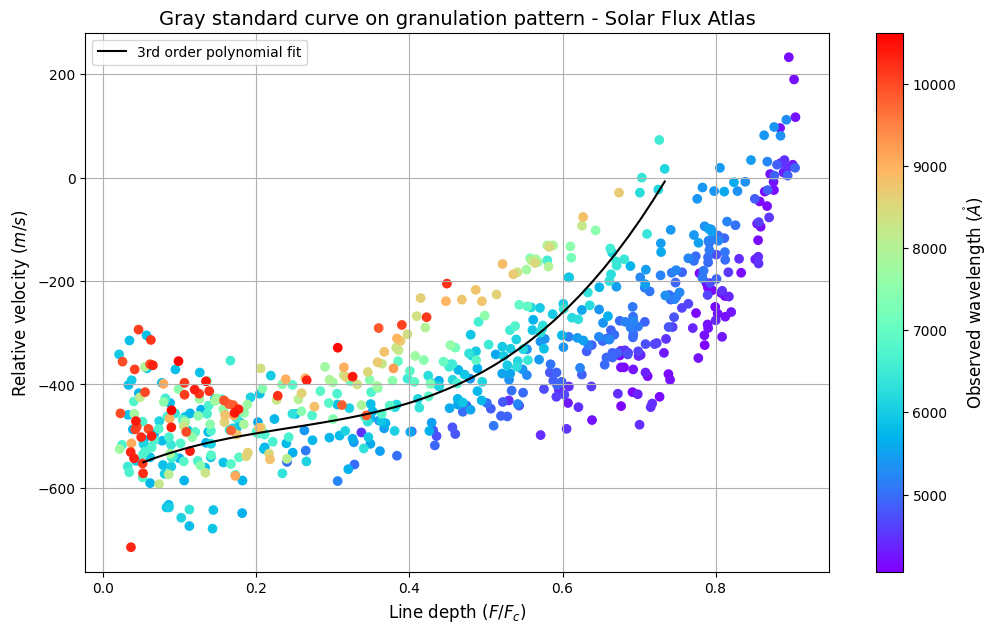

In [15]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

pol = Polynomial.fit(1-values_VIS_standard['Flux'],values_VIS_standard['Velocity'], 3)
param = pol.convert().coef
values_flux = np.linspace(min(1-values_VIS_standard['Flux']), max(1-values_VIS_standard['Flux']), len(1-values_VIS_standard['Flux']))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(1-VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.plot(values_flux,flux_fit,color='k',label='3rd order polynomial fit')

ax.set_title('Gray standard curve on granulation pattern - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

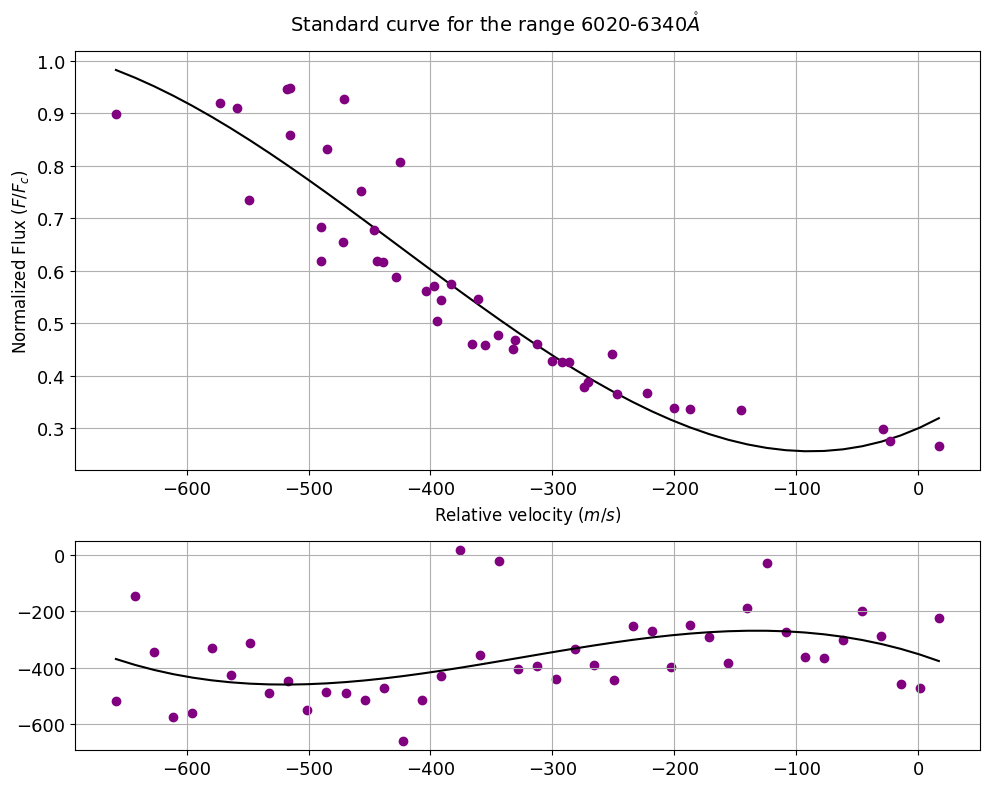

In [16]:
# Calcular errores basados en los residuos del ajuste
pol = Polynomial.fit(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], 3)
param = pol.convert().coef
values_vel = np.linspace(min(values_VIS_standard['Velocity']), max(values_VIS_standard['Velocity']), len(values_VIS_standard['Velocity']))
vel_fit = poly.polyval(values_vel,param)

residuos = (values_VIS_standard['Velocity']) - vel_fit
std_flux = np.std(residuos) 

#Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Standard curve for the range 6020-6340$\mathring{A}$',fontsize=14)

ax1.errorbar(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], capsize=6,fmt='o', color='purple')
ax1.plot(values_vel,vel_fit,c='k')
ax1.set_ylabel(r'Normalized Flux $(F/F_{c})$',fontsize=12)
ax1.set_xlabel(r'Relative velocity $(m/s)$',fontsize=12)
# ax1.text(-380, 0.2, r'$F/F_c$ = {}$v^3$ + {}$v^2$ + {}$v$ + {}'.format(round(param[0],4),round(param[1],4),round(param[2],5),round(param[3],8)),color='k',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

#Check if there a polynomial correction on the residues
pol_res = Polynomial.fit(values_vel,residuos, 3)
param_res = pol_res.convert().coef
values_res = np.linspace(min(values_vel), max(values_vel), len(values_vel))
res_fit = poly.polyval(values_res,param_res)

ax2.scatter(values_vel,residuos,c='purple')
ax2.plot(values_res,res_fit,c='k')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)


fig.tight_layout()
#plt.savefig('Calibracion.pdf')

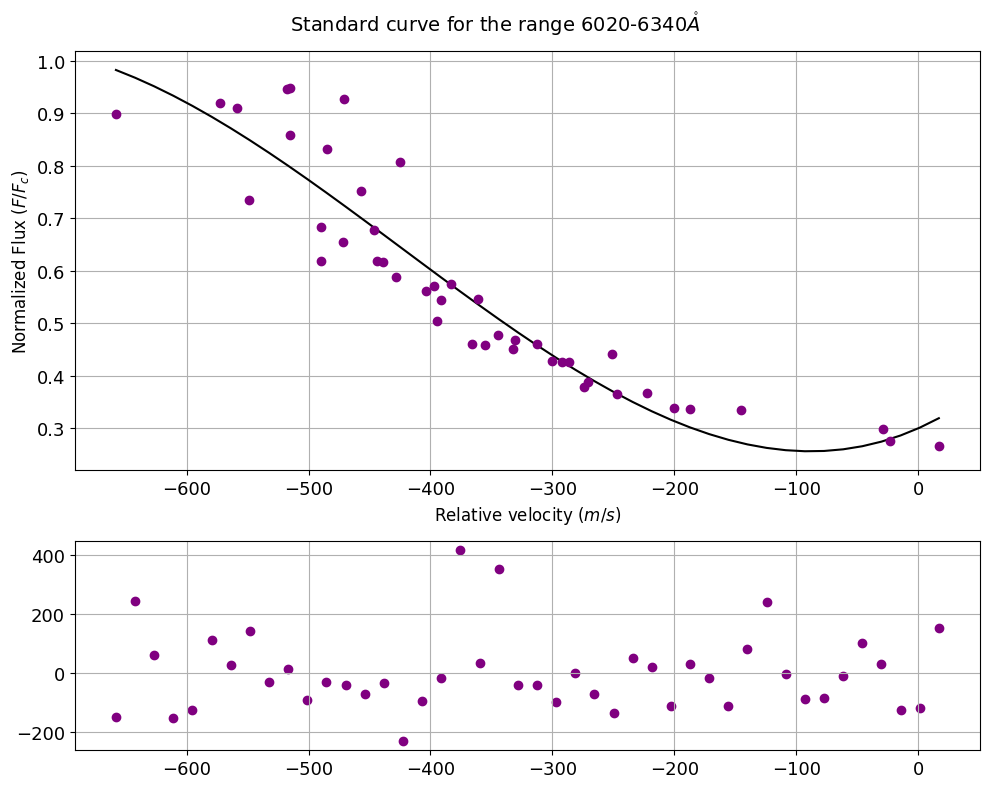

In [17]:
#Ajuste de errores basados en los residuos del ajuste
pol = Polynomial.fit(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], 3)
param = pol.convert().coef 
values_vel = np.linspace(min(values_VIS_standard['Velocity']), max(values_VIS_standard['Velocity']), len(values_VIS_standard['Velocity']))
vel_fit = poly.polyval(values_vel,param+param_res)

residuos = (values_VIS_standard['Velocity']) - vel_fit
std_flux = np.std(residuos) 

#Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Standard curve for the range 6020-6340$\mathring{A}$',fontsize=14)

ax1.errorbar(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], capsize=6,fmt='o', color='purple')
ax1.plot(values_vel,poly.polyval(values_vel,param),c='k')
ax1.set_ylabel(r'Normalized Flux $(F/F_{c})$',fontsize=12)
ax1.set_xlabel(r'Relative velocity $(m/s)$',fontsize=12)
# ax1.text(-380, 0.2, r'$F/F_c$ = {}$v^3$ + {}$v^2$ + {}$v$ + {}'.format(round(param[0],4),round(param[1],4),round(param[2],5),round(param[3],8)),color='k',fontsize=14)
ax1.grid()
ax1.tick_params(axis='both',labelsize=13)

ax2.scatter(values_vel,residuos,c='purple')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)


fig.tight_layout()
#plt.savefig('Calibracion.pdf')

Now, we define the new standard curve (all green range) with their respectives shifts and yes, we include the near infrared.

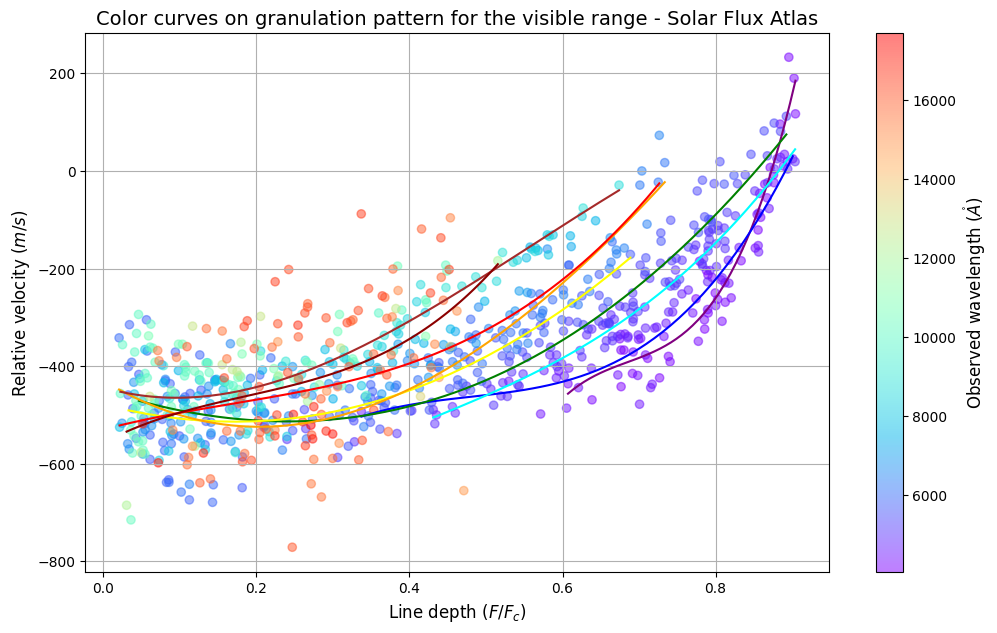

In [18]:
#List for the data
param_ALL = []
fit_ALL = []

fig5, ax = plt.subplots(1,1,figsize=(12,7))

#Plot the cuadratic fit for each color
for i in range(0,len(values_ALL)):  
    
    pol = Polynomial.fit(1-values_ALL[i]['Flux'], values_ALL[i]['Velocity'], 3)
    param = pol.convert().coef
    values_flux = np.linspace(min(1-values_ALL[i]['Flux']), max(1-values_ALL[i]['Flux']), len(1-values_ALL[i]['Flux']))
    flux_fit = poly.polyval(values_flux,param)

    ax.plot(values_flux,flux_fit, color=colors_fit[i])

    param_ALL.append(pd.DataFrame(param))
    fit_ALL.append([values_flux,flux_fit])

scatter = ax.scatter(1-ALL_data['Flux'],ALL_data['Velocity'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o', alpha=0.5)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Color curves on granulation pattern for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig5.savefig('ColorCurves_VIS.pdf')

In [19]:
#Calculate te average and show the parameters
parameters_ALL = pd.concat(param_ALL,axis=1)
parameters_ALL = parameters_ALL.set_axis(colors_fit, axis=1)
parameters_ALL = parameters_ALL.T.set_axis(['ax^3','bx^2','cx','d'],axis=1)

parameters_ALL

,ax^3,bx^2,cx,d
purple,-14451.987575,60445.921804,-87428.172843,42555.754046
blue,-1158.293234,4009.097642,-8010.571736,5577.135276
cyan,-914.382125,1634.746473,-2463.509696,2022.580288
green,-449.284920,-511.856559,945.410796,320.346419
yellow,-478.485057,-407.341663,1159.044573,96.328050
orange,-429.279850,-958.403791,2553.498667,-670.993195
red,-529.848562,414.011208,-892.361532,1759.257043
brown,-443.590414,-456.747892,2611.755104,-1549.976429
darkred,-557.023390,825.543288,-2500.437988,4415.089049


In [20]:
scale_coeff = pd.DataFrame()
scale_coeff['3rd order'] = parameters_ALL['ax^3']/parameters_ALL['ax^3'].iloc[3]
scale_coeff['2nd order'] = parameters_ALL['bx^2']/parameters_ALL['bx^2'].iloc[3]
scale_coeff['1st order'] = parameters_ALL['cx']/parameters_ALL['cx'].iloc[3]
scale_coeff['Shift'] = parameters_ALL['d']/parameters_ALL['d'].iloc[3]
scale_coeff

,3rd order,2nd order,1st order,Shift
purple,32.166643,-118.091525,-92.476385,132.842921
blue,2.578082,-7.832463,-8.473112,17.409701
cyan,2.035194,-3.193759,-2.605756,6.313728
green,1.000000,1.000000,1.000000,1.000000
yellow,1.064992,0.795812,1.225969,0.300700
orange,0.955474,1.872407,2.700941,-2.094586
red,1.179315,-0.808842,-0.943888,5.491733
brown,0.987325,0.892336,2.762561,-4.838438
darkred,1.239800,-1.612841,-2.644816,13.782233


### Check the lower potential energy dependence on wavelength

### Gray and Oostra Flux Deficit